### RMOTR FINAL PROJECT QUESTIONS #1-3

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from zipfile import ZipFile
from pandas.api.types import CategoricalDtype
from sklearn.preprocessing import OneHotEncoder
from textwrap import wrap

import warnings
warnings.filterwarnings('ignore')

sns.set(rc={'figure.figsize': (14, 7)})

In [121]:
df_public = pd.read_csv('data/survey_results_public.csv')
df_schema = pd.read_csv('data/survey_results_schema.csv')


In [122]:
df_public.dropna(subset=['ConvertedSalary'], inplace=True)

In [123]:
q1 = df_public['ConvertedSalary'].quantile(0.25)
q3 = df_public['ConvertedSalary'].quantile(0.75)
IQR = q3 - q1
print(q1, q3, IQR)

23844.0 93000.0 69156.0


In [124]:
lb = df_public['ConvertedSalary'] >= (q1 - 1.5 * IQR)
ub = df_public['ConvertedSalary'] <= (q3 + 1.5 * IQR)

df_public = df_public[lb & ub]

In [125]:
for col in df_public:
    if df_public[col].dtype == object:
        df_public[col][df_public[col].isna()] = 'No Response'

In [126]:

df_public['YearsCoding'] = df_public['YearsCoding'].astype(CategoricalDtype([
    '0-2 years', '3-5 years', '6-8 years', '9-11 years'    
    , '12-14 years','15-17 years', '18-20 years' 
    , '21-23 years', '24-26 years', '27-29 years','30 or more years'
],ordered=True))

df_public['YearsCodingProf'] = df_public['YearsCodingProf'].astype(CategoricalDtype([
    '0-2 years', '3-5 years', '6-8 years', '9-11 years'    
    , '12-14 years','15-17 years', '18-20 years' 
    , '21-23 years', '24-26 years', '27-29 years','30 or more years'], ordered=True))

df_public['CompanySize'] = df_public['CompanySize'].astype(CategoricalDtype([
    'Fewer than 10 employees', '10 to 19 employees', '20 to 99 employees',
    '100 to 499 employees', '500 to 999 employees',
    '1,000 to 4,999 employees','5,000 to 9,999 employees', '10,000 or more employees'
],ordered=True))

df_public['JobSatisfaction'] = df_public['JobSatisfaction'].astype(CategoricalDtype([
    'No Response','Extremely dissatisfied', 'Moderately dissatisfied', 'Slightly dissatisfied',
    'Neither satisfied nor dissatisfied', 'Slightly satisfied', 'Moderately satisfied', 'Extremely satisfied'
],ordered=True))

df_public['FormalEducation'] = df_public['FormalEducation'].astype(CategoricalDtype([
    'I never completed any formal education',
    'Primary/elementary school',
    'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
    'Some college/university study without earning a degree',
    'Associate degree',
    'Bachelor’s degree (BA, BS, B.Eng., etc.)',
    'Master’s degree (MA, MS, M.Eng., MBA, etc.)',
    'Professional degree (JD, MD, etc.)', 
    'Other doctoral degree (Ph.D, Ed.D., etc.)'], ordered=True))

df_public['Age'] = df_public['Age'].astype(CategoricalDtype([
    'Under 18 years old', '18 - 24 years old', '25 - 34 years old',
    '35 - 44 years old', '45 - 54 years old',  '55 - 64 years old'
    ,'65 years or older'
],ordered=True))

## QUESTIONS

### 1. Is there a correlation between the years of experience of a developer and their salary? What about age?

In [74]:
sub_df = df_public.loc[:,['YearsCoding','ConvertedSalary']]
sub_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45069 entries, 1 to 89965
Data columns (total 2 columns):
YearsCoding        45053 non-null object
ConvertedSalary    45069 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.0+ MB


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

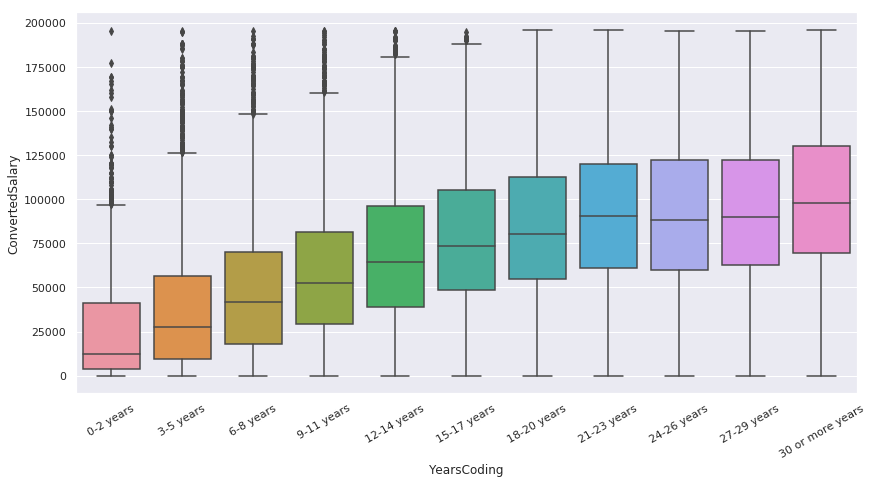

In [78]:
sns.boxplot(data=sub_df, x='YearsCoding', y='ConvertedSalary')
plt.xticks(rotation=30)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

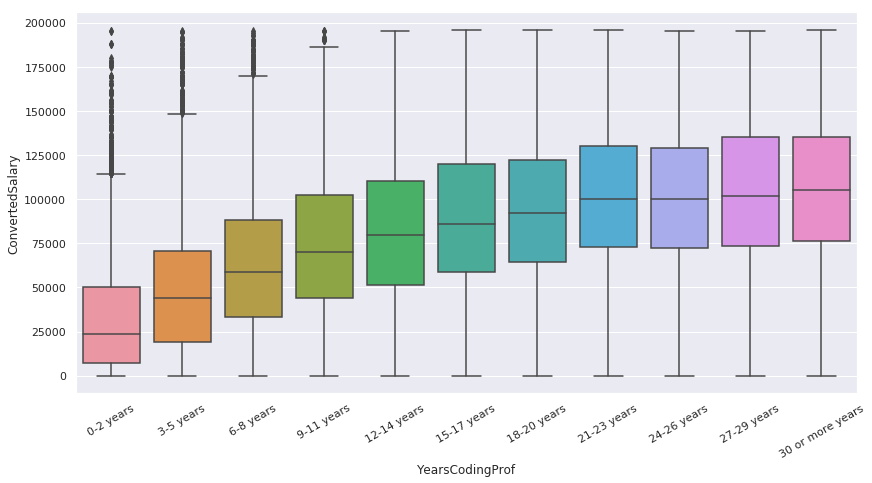

In [79]:
sns.boxplot(data=sub_df, x='YearsCodingProf', y='ConvertedSalary')
plt.xticks(rotation=30)

#### Survey respondents with more years of coding experience ((whether its just in general or for professional work) have a higher median salary.

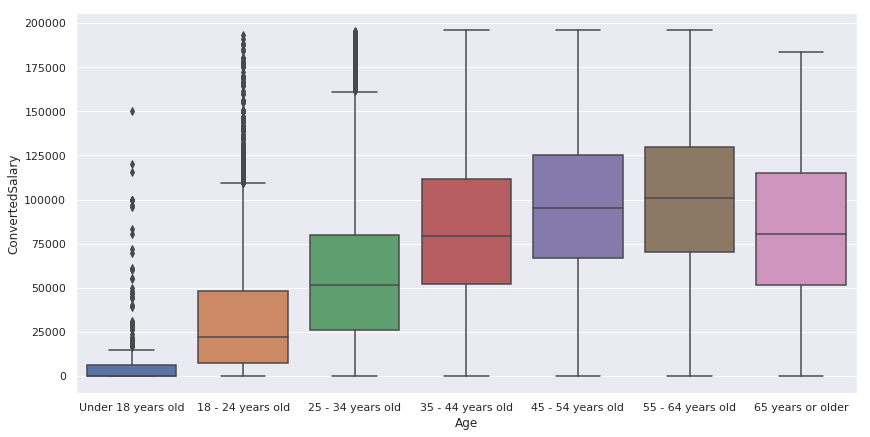

In [80]:
sns.boxplot(data=sub_df, x='Age', y='ConvertedSalary')

#### There is generally a positive correlation with Age and Converted Salary. As respondents age group increases, median salary increases as well. This is mostly the case, excluding the 65 year old age group which most likely consists of a larger population who have retired.

### 2. Is there any relationship between bootcamp education and salaries? What about formal education?

In [143]:
sub_df = df_public.loc[:,['EducationTypes','ConvertedSalary']]

In [144]:
sub_df.reset_index(drop=True,inplace=True)

In [145]:
educationtype_dummies = pd.get_dummies(sub_df['EducationTypes'].str.split(';', expand=True).apply(lambda s: s.str.strip()).stack(), prefix='is_educationtype').sum(level=0)

sub_df = pd.concat([sub_df,educationtype_dummies],axis=1)  

In [146]:
del sub_df['EducationTypes']

In [147]:
bootcamp_salary_df = sub_df.loc[:,['ConvertedSalary', 'is_educationtype_Participated in a full-time developer training program or bootcamp']]

In [148]:
corr = bootcamp_salary_df.corr()
corr

,ConvertedSalary,is_educationtype_Participated in a full-time developer training program or bootcamp
ConvertedSalary,1.000000,0.014304
is_educationtype_Participated in a full-time developer training program or bootcamp,0.014304,1.000000


#### There is little or no correlation between Bootcamp education and their salary.

In [85]:
sub_df = df_public.loc[:,['FormalEducation','ConvertedSalary']]

[Text(0,0,'I never completed\nany formal education'),
 Text(0,0,'Primary/elementary\nschool'),
 Text(0,0,'Secondary school\n(e.g. American high\nschool, German\nRealschule or\nGymnasium, etc.)'),
 Text(0,0,'Some\ncollege/university\nstudy without\nearning a degree'),
 Text(0,0,'Associate degree'),
 Text(0,0,'Bachelor’s degree\n(BA, BS, B.Eng.,\netc.)'),
 Text(0,0,'Master’s degree (MA,\nMS, M.Eng., MBA,\netc.)'),
 Text(0,0,'Professional degree\n(JD, MD, etc.)'),
 Text(0,0,'Other doctoral\ndegree (Ph.D, Ed.D.,\netc.)')]

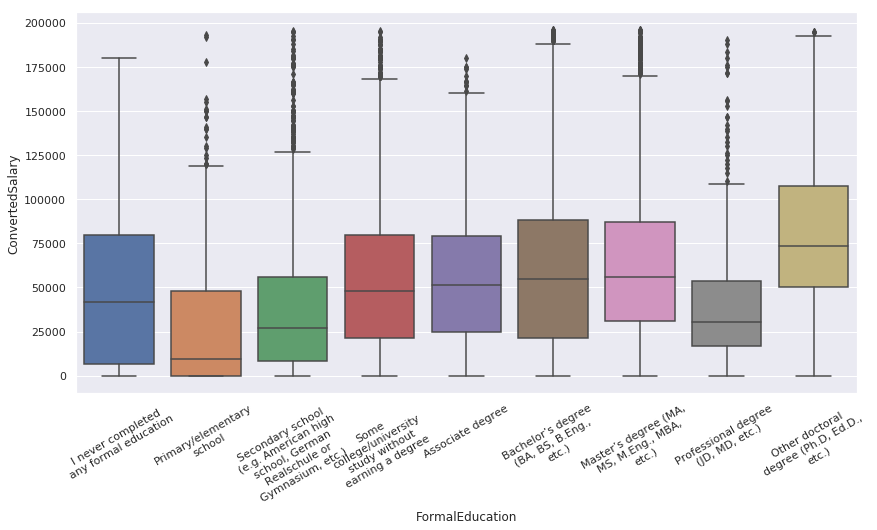

In [88]:
ax = sns.boxplot(data=sub_df, x='FormalEducation', y='ConvertedSalary')

labels = ['\n'.join(wrap(label.get_text(), 20)) for label in ax.get_xticklabels()]

ax.set_xticklabels(labels,rotation=30)

#### As respondents complete higher levels of FormalEducation, they tend to have higher median salaries.
#### However this is not always true. There are individuals with Professional degrees that have a lower median salary... Can't explain yet.

### 3. Is there any relationship between years of experience and the technologies/languages employed by developers?


In [130]:
sub_df = df_public.loc[:,['YearsCoding','LanguageWorkedWith', 'DatabaseWorkedWith', 'PlatformWorkedWith', 'FrameworkWorkedWith']]


In [131]:
sub_df['CountLanguageWorkedWith'] = [0 if v == 'No Response' else len(v.split(';')) for v in sub_df['LanguageWorkedWith']]
sub_df['CountDBWorkedWith'] = [0 if v == 'No Response' else len(v.split(';')) for v in sub_df['DatabaseWorkedWith']]
sub_df['CountPlatformWorkedWith'] = [0 if v == 'No Response' else len(v.split(';')) for v in sub_df['PlatformWorkedWith']]
sub_df['CountFrameworkWorkedWith'] = [0 if v == 'No Response' else len(v.split(';')) for v in sub_df['FrameworkWorkedWith']]


In [133]:
corr = sub_df.loc[:,['YearsCoding','CountLanguageWorkedWith','CountDBWorkedWith','CountPlatformWorkedWith','CountFrameworkWorkedWith']].corr()

In [134]:
corr

,CountLanguageWorkedWith,CountDBWorkedWith,CountPlatformWorkedWith,CountFrameworkWorkedWith
CountLanguageWorkedWith,1.000000,0.466389,0.442271,0.414010
CountDBWorkedWith,0.466389,1.000000,0.434104,0.433821
CountPlatformWorkedWith,0.442271,0.434104,1.000000,0.384464
CountFrameworkWorkedWith,0.414010,0.433821,0.384464,1.000000


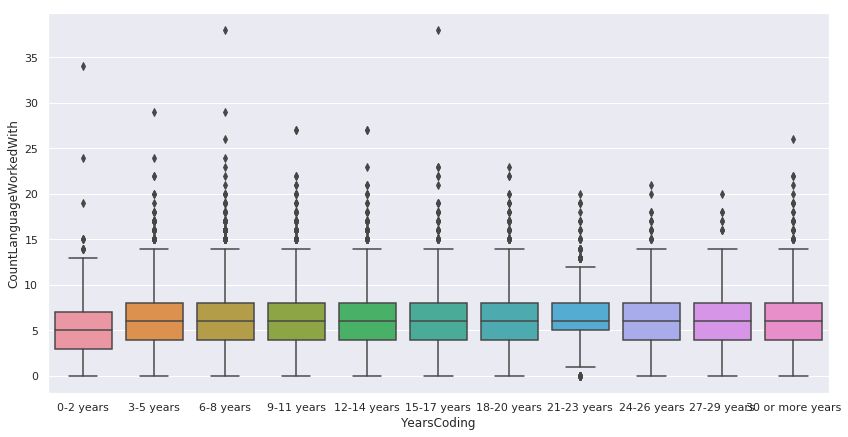

In [136]:
sns.boxplot(data=sub_df,x='YearsCoding',y='CountLanguageWorkedWith')

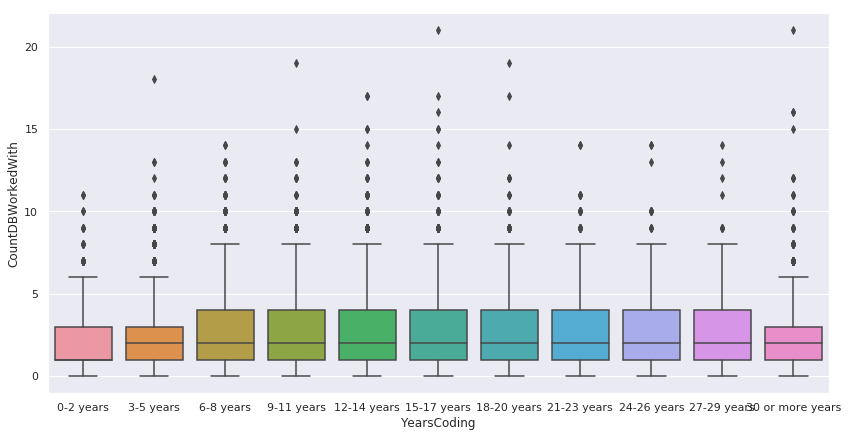

In [138]:
sns.boxplot(data=sub_df,x='YearsCoding',y='CountDBWorkedWith')

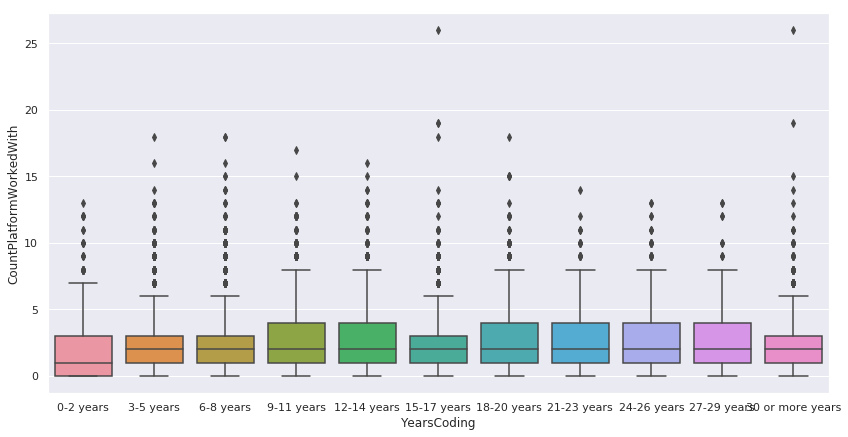

In [139]:
sns.boxplot(data=sub_df,x='YearsCoding',y='CountPlatformWorkedWith')

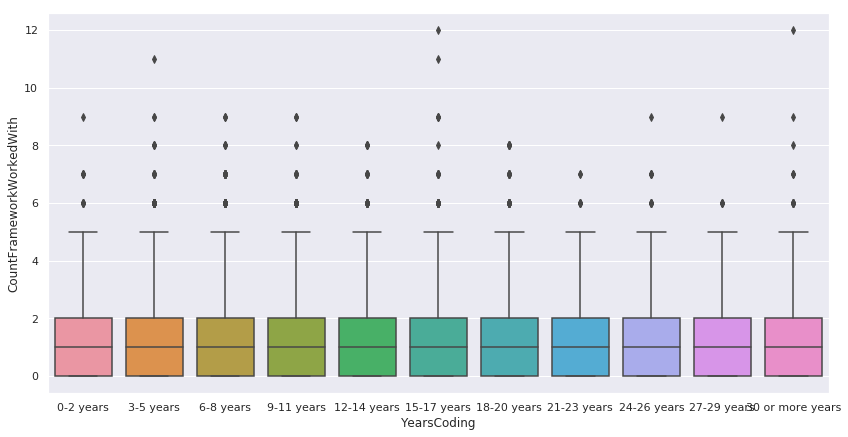

In [140]:
sns.boxplot(data=sub_df,x='YearsCoding',y='CountFrameworkWorkedWith')

#### There isn't a strong relationship with the number of technologies/languages worked as related to years of experiences had.